Enter your city:  bangalore


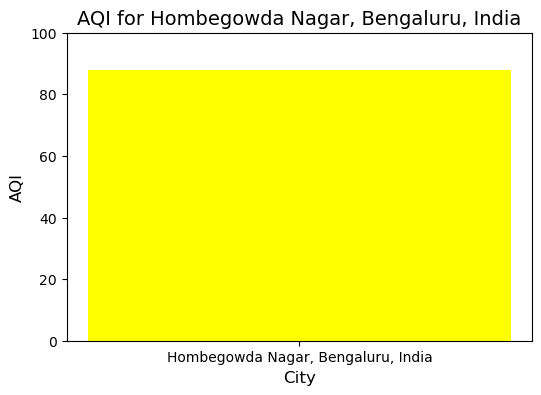

The Air Quality Index (AQI) in Hombegowda Nagar, Bengaluru, India is 88, which is moderate.
Details: Air quality is acceptable.
Source: World Air Quality Index Project and originating EPA


In [2]:
import requests
import matplotlib.pyplot as plt

# Category descriptions
category_1 = "Details: Air quality is considered satisfactory."
category_2 = "Details: Air quality is acceptable."
category_3 = "Details: Members of sensitive groups may experience health effects."
category_4 = "Details: Everyone may begin to experience health effects."
category_5 = "Details: Health warnings of emergency conditions."
category_6 = "Details: Health alert: everyone may experience more serious health effects."
source_info = "\nSource: World Air Quality Index Project and originating EPA"

# Return category description depending on the AQI
def category_name(aqi):
    if aqi <= 50:
        return "good.\n" + category_1 + source_info
    elif aqi <= 100:
        return "moderate.\n" + category_2 + source_info
    elif aqi <= 150:
        return "unhealthy for sensitive groups.\n" + category_3 + source_info
    elif aqi <= 200:
        return "unhealthy.\n" + category_4 + source_info
    elif aqi <= 300:
        return "very unhealthy.\n" + category_5 + source_info
    else:
        return "hazardous.\n" + category_6 + source_info

# Fetch API data and return it as a string
def check_aqi(city):
    api_key = "33c09fc4c020747411569af6a6f594ced314634a"
    url = f"https://api.waqi.info/feed/{city}/?token={api_key}"
    response = requests.get(url)
    json_data = response.json()

    if json_data['status'] == 'error':
        return f"Error: No AQI data found for the specified city: {city}."
    
    aqi = json_data['data']['aqi']
    city_name = json_data['data']['city']['name']
    category = category_name(aqi)
    
    # Plotting the AQI result
    plot_aqi(city_name, aqi)
    
    return f"The Air Quality Index (AQI) in {city_name} is {aqi}, which is " + category

def plot_aqi(city_name, aqi):
    # Create a bar chart for AQI
    plt.figure(figsize=(6, 4))
    plt.bar(city_name, aqi, color='skyblue')
    
    # Add title and labels
    plt.title(f"AQI for {city_name}", fontsize=14)
    plt.xlabel('City', fontsize=12)
    plt.ylabel('AQI', fontsize=12)
    
    # Display AQI categories with different colors
    if aqi <= 50:
        plt.ylim(0, 100)
        color = 'green'
    elif aqi <= 100:
        plt.ylim(0, 100)
        color = 'yellow'
    elif aqi <= 150:
        plt.ylim(0, 200)
        color = 'orange'
    elif aqi <= 200:
        plt.ylim(0, 200)
        color = 'red'
    elif aqi <= 300:
        plt.ylim(0, 300)
        color = 'purple'
    else:
        plt.ylim(0, 500)
        color = 'brown'
        
    # Apply color
    plt.bar(city_name, aqi, color=color)
    
    # Show the plot
    plt.show()

# Enter Location and print AQI information
city = input("Enter your city: ")
print(check_aqi(city))


In [1]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [3]:
import streamlit as st
import requests
import matplotlib.pyplot as plt

# Category descriptions
category_1 = "Details: Air quality is considered satisfactory."
category_2 = "Details: Air quality is acceptable."
category_3 = "Details: Members of sensitive groups may experience health effects."
category_4 = "Details: Everyone may begin to experience health effects."
category_5 = "Details: Health warnings of emergency conditions."
category_6 = "Details: Health alert: everyone may experience more serious health effects."
source_info = "\nSource: World Air Quality Index Project and originating EPA"

# Function to return category description
def category_name(aqi):
    if aqi <= 50:
        return "Good.\n" + category_1 + source_info
    elif aqi <= 100:
        return "Moderate.\n" + category_2 + source_info
    elif aqi <= 150:
        return "Unhealthy for sensitive groups.\n" + category_3 + source_info
    elif aqi <= 200:
        return "Unhealthy.\n" + category_4 + source_info
    elif aqi <= 300:
        return "Very Unhealthy.\n" + category_5 + source_info
    else:
        return "Hazardous.\n" + category_6 + source_info

# Function to fetch AQI data
def check_aqi(city):
    api_key = "33c09fc4c020747411569af6a6f594ced314634a"
    url = f"https://api.waqi.info/feed/{city}/?token={api_key}"
    response = requests.get(url)
    json_data = response.json()

    if json_data['status'] == 'error':
        return None, f"Error: No AQI data found for {city}."
    
    aqi = json_data['data']['aqi']
    city_name = json_data['data']['city']['name']
    category = category_name(aqi)
    
    return aqi, f"The Air Quality Index (AQI) in {city_name} is {aqi}, which is " + category

# Function to plot AQI
def plot_aqi(city_name, aqi):
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Define AQI category colors
    if aqi <= 50:
        color = 'green'
    elif aqi <= 100:
        color = 'yellow'
    elif aqi <= 150:
        color = 'orange'
    elif aqi <= 200:
        color = 'red'
    elif aqi <= 300:
        color = 'purple'
    else:
        color = 'brown'
    
    ax.bar(city_name, aqi, color=color)
    ax.set_title(f"AQI for {city_name}", fontsize=14)
    ax.set_xlabel("City", fontsize=12)
    ax.set_ylabel("AQI", fontsize=12)
    
    st.pyplot(fig)

# Streamlit UI
st.title("🌍 Air Quality Index (AQI) Calculator")
st.write("Enter a city name to check its air quality index.")

# Input city name
city = st.text_input("Enter city name:")

if st.button("Check AQI"):
    if city:
        aqi, result = check_aqi(city)
        if aqi is None:
            st.error(result)
        else:
            st.success(result)
            plot_aqi(city, aqi)
    else:
        st.warning("Please enter a valid city name.")


2025-02-18 09:52:28.856 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 09:52:29.684 
  command:

    streamlit run C:\Users\91636\anaconda3\anaconda\envs\aqi\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-18 09:52:29.685 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 09:52:29.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 09:52:29.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 09:52:29.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 09:52:29.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 09:52:29.694 Threa

In [4]:
import streamlit as st
import requests
import matplotlib.pyplot as plt

# Your code here...

# Streamlit UI
st.title("Air Quality Index (AQI) Calculator")
city = st.text_input("Enter your city:")

if city:
    result = check_aqi(city)
    st.write(result)


2025-02-18 10:28:03.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 10:28:03.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 10:28:03.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 10:28:03.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 10:28:03.256 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 10:28:03.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 10:28:03.267 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 10:28:03.267 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar